# Capstone Project
## Overview
analysing the movie ratings and determinig its accuracy

**TASK: Read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**



### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

**Exploring the DataFrame Properties and Head.**

In [3]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info

<bound method DataFrame.info of                                      FILM  STARS  RATING  VOTES
0             Fifty Shades of Grey (2015)    4.0     3.9  34846
1                   Jurassic World (2015)    4.5     4.5  34390
2                  American Sniper (2015)    5.0     4.8  34085
3                        Furious 7 (2015)    5.0     4.8  33538
4                       Inside Out (2015)    4.5     4.5  15749
..                                    ...    ...     ...    ...
499                      Valiyavan (2015)    0.0     0.0      0
500            WWE SummerSlam 2015 (2015)    0.0     0.0      0
501       Yagavarayinum Naa Kaakka (2015)    0.0     0.0      0
502  Yesterday, Today and Tomorrow (1964)    0.0     0.0      0
503                         Zarafa (2012)    0.0     0.0      0

[504 rows x 4 columns]>

<Axes: xlabel='RATING', ylabel='VOTES'>

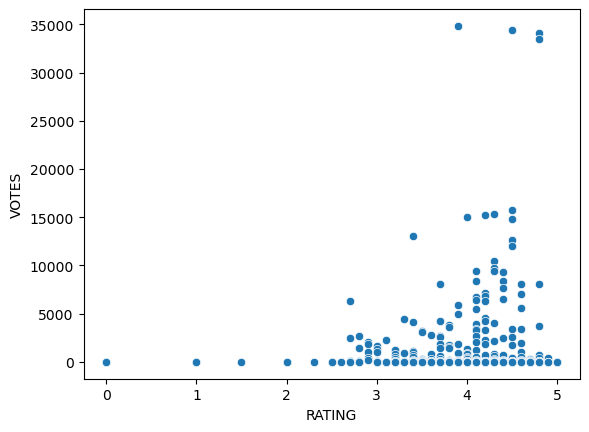

In [6]:
sns.scatterplot(data = fandango,x = 'RATING', y = 'VOTES')

In [7]:
fandango.corr(numeric_only = True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [8]:
fandango['years']=fandango['FILM'].str.extract('(\d{4})')
fandango

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\entro\AppData\Local\Temp\ipykernel_21040\1366240310.py:1: SyntaxWarning: invalid escape sequence '\d'
  fandango['years']=fandango['FILM'].str.extract('(\d{4})')


,FILM,STARS,RATING,VOTES,years
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [9]:
fandango['years'].value_counts()

years
2015    476
2014     24
2016      1
1001      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='years', ylabel='count'>

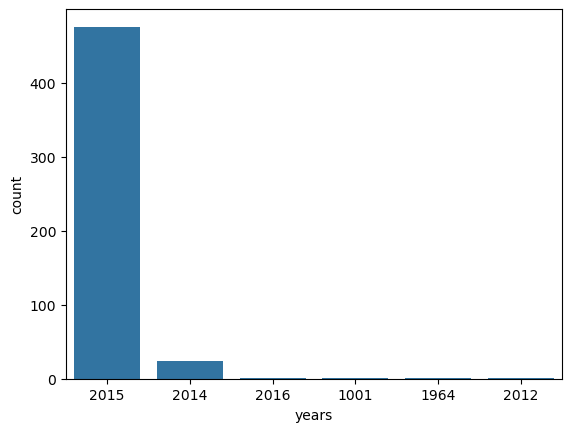

In [10]:
sns.countplot(data = fandango,x = 'years')

In [11]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,years
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [12]:
no_votes = fandango['VOTES']== 0
no_votes.sum()



69

In [13]:
fandango_reviewedfilm = fandango[fandango['VOTES']>0]
fandango_reviewedfilm

,FILM,STARS,RATING,VOTES,years
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


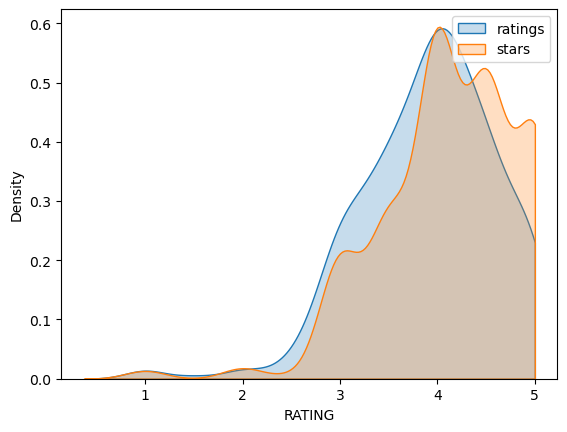

In [14]:
sns.kdeplot(data = fandango_reviewedfilm,  x = 'RATING',clip =[0,5],fill = True,label = 'ratings')
sns.kdeplot(data = fandango_reviewedfilm,x = 'STARS',clip =[0,5],fill = True,label ='stars')
plt.legend()

**Analysing the disperency**

In [15]:
fandango_reviewedfilm['star-rating'] = (fandango['STARS']-fandango['RATING']).round(1)
fandango_reviewedfilm

C:\Users\entro\AppData\Local\Temp\ipykernel_21040\2375589054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_reviewedfilm['star-rating'] = (fandango['STARS']-fandango['RATING']).round(1)


,FILM,STARS,RATING,VOTES,years,star-rating
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<Axes: xlabel='star-rating', ylabel='count'>

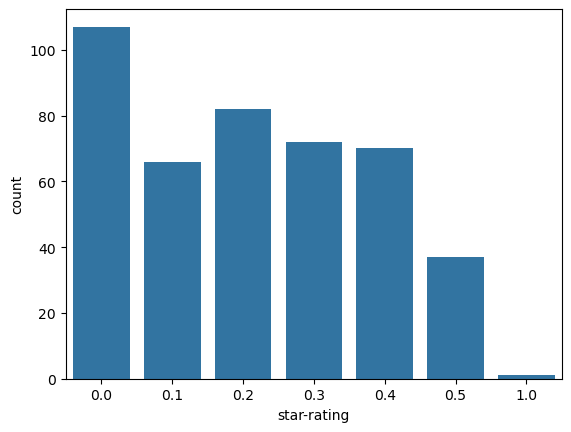

In [16]:
fandango_reviewedfilm['star-rating'].value_counts()
sns.countplot(data = fandango_reviewedfilm,x = 'star-rating')

In [17]:
fandango_reviewedfilm[fandango_reviewedfilm['star-rating']>= 1]

,FILM,STARS,RATING,VOTES,years,star-rating
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparing of Fandango Ratings to Other Sites

In [18]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [19]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

In [20]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [21]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [22]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


(0.0, 100.0)

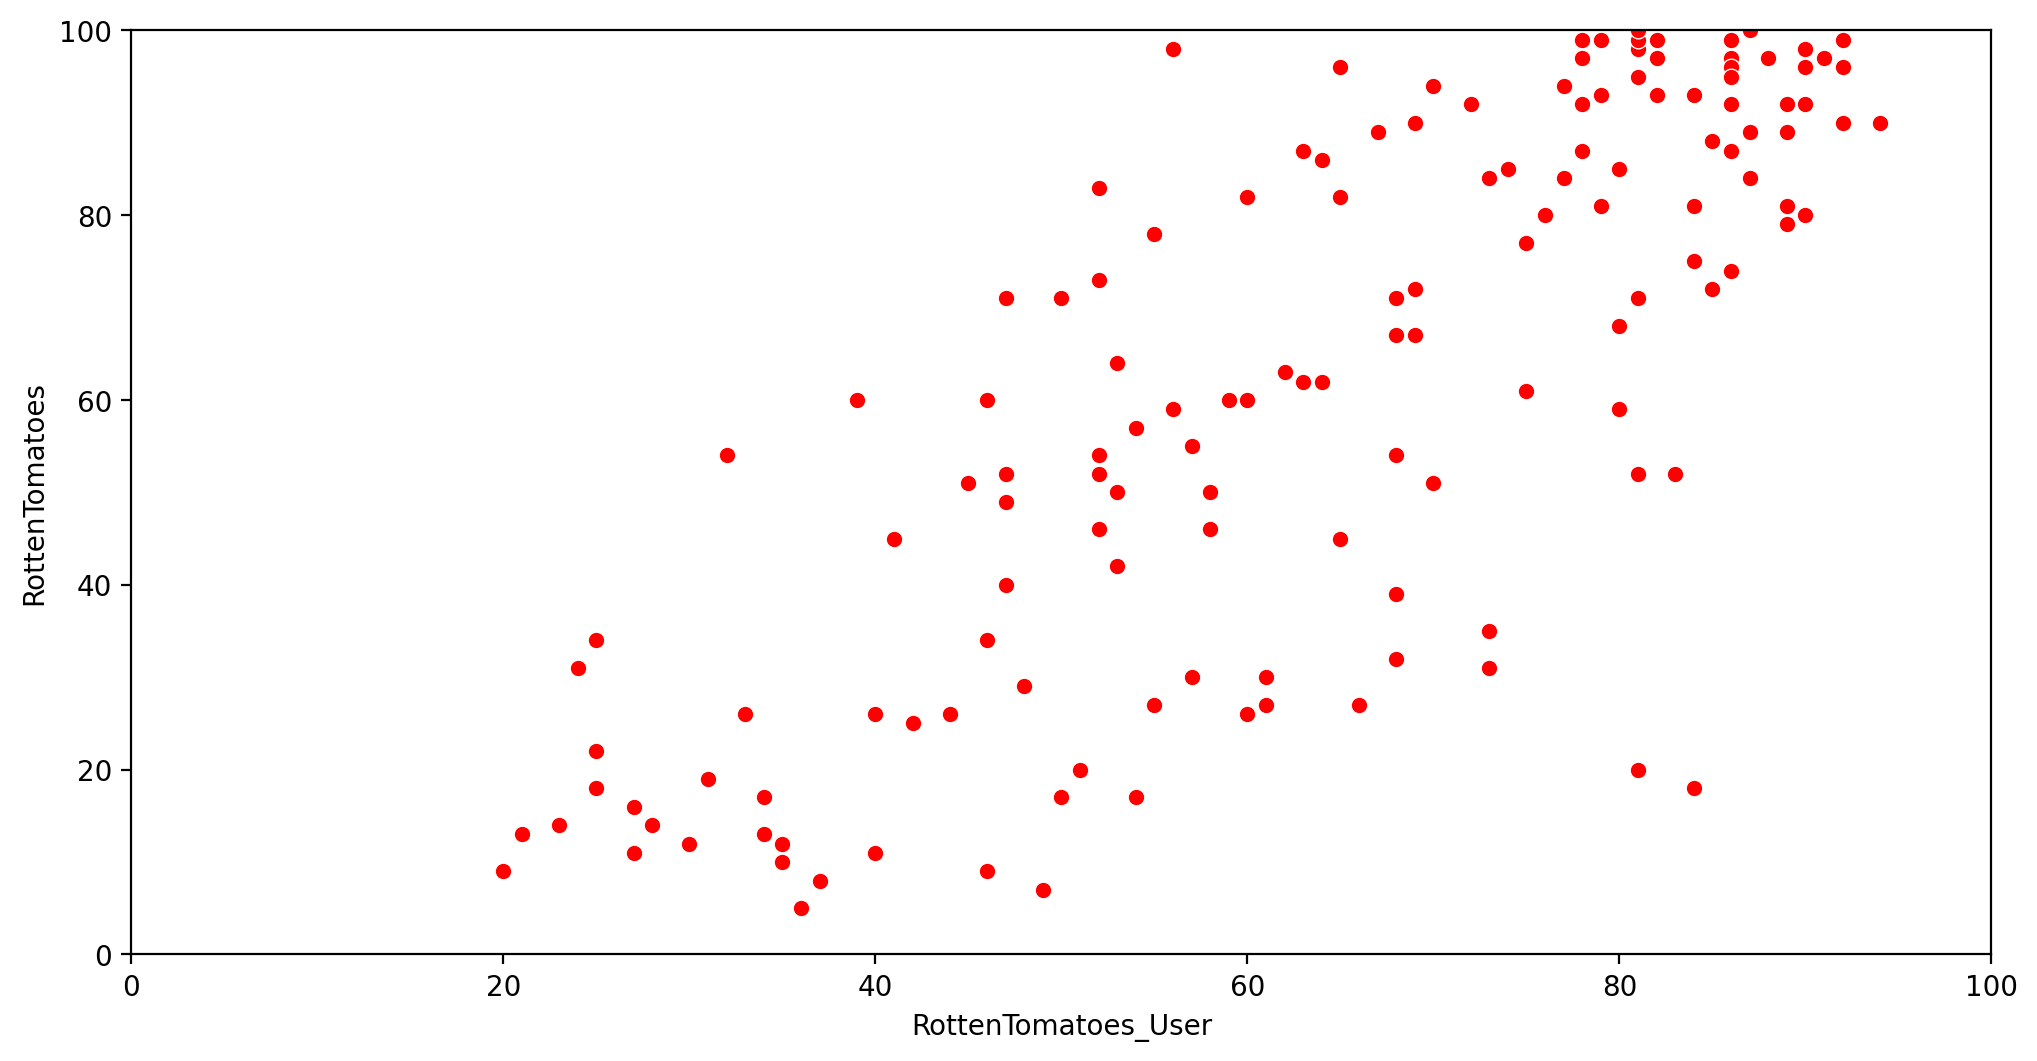

In [23]:
plt.figure(figsize=(12,6),dpi = 200)
sns.scatterplot(data = all_sites,x ='RottenTomatoes_User',y = 'RottenTomatoes',color = 'red')
plt.xlim(0,100)
plt.ylim(0,100)

Let's quantify this difference by comparing the critics ratings and the RT User ratings. 


In [24]:
all_sites['ROTTEN_DIFF']= all_sites['RottenTomatoes']- all_sites['RottenTomatoes_User']

In [25]:
(all_sites['ROTTEN_DIFF'].abs()).mean()

15.095890410958905

Plot the distribution of the differences between RT Critics Score and RT User Score

<Axes: xlabel='ROTTEN_DIFF', ylabel='Density'>

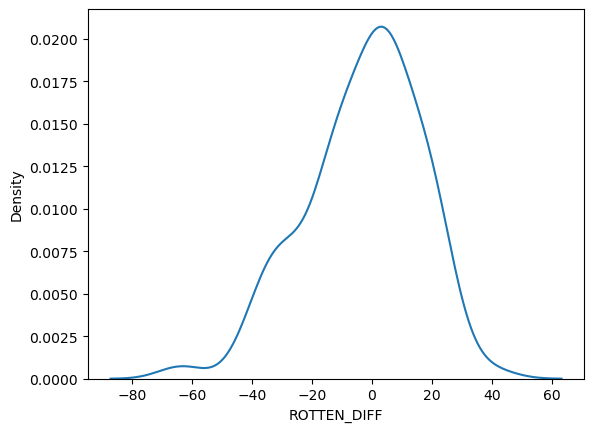

In [26]:
sns.kdeplot(data = all_sites,x = 'ROTTEN_DIFF')

<Axes: xlabel='Rotdifabs', ylabel='Count'>

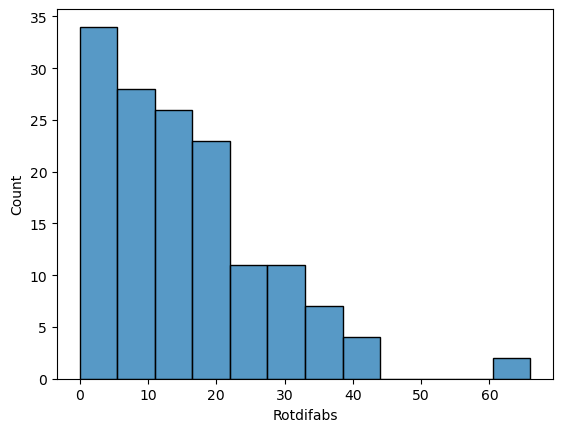

In [27]:
all_sites['Rotdifabs'] =all_sites['ROTTEN_DIFF'].abs()
all_sites
sns.histplot(data = all_sites,x  = 'Rotdifabs')

In [28]:
all_sites.nsmallest(5,'ROTTEN_DIFF')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF,Rotdifabs
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61,61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42,42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42,42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39,39


** top 5 movies critics scores higher than users on average.**

In [29]:
all_sites.nlargest(5,'ROTTEN_DIFF')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF,Rotdifabs
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24,24


In [31]:
#analysing MetaCritic now

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

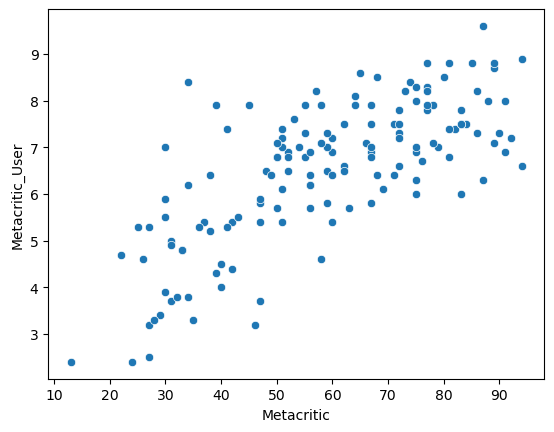

In [32]:
sns.scatterplot(data = all_sites,x = 'Metacritic',y = 'Metacritic_User')

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

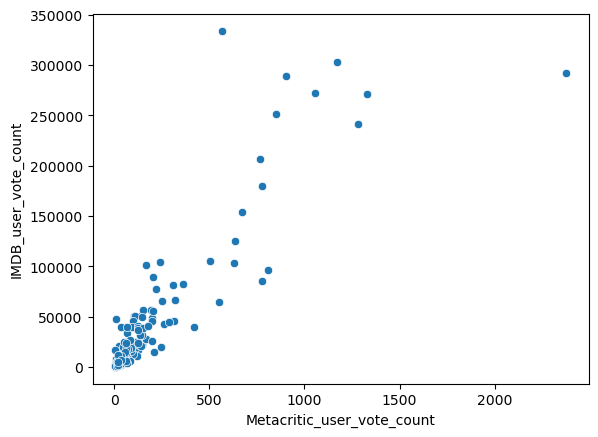

In [33]:
sns.scatterplot(data =all_sites,x ='Metacritic_user_vote_count',y = 'IMDB_user_vote_count' )

In [34]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF,Rotdifabs
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


In [35]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF,Rotdifabs
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


## Fandago Scores vs. All Sites

In [36]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF,Rotdifabs
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14
...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19,19


In [37]:
fandango

,FILM,STARS,RATING,VOTES,years
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [38]:
df = pd.merge(fandango,all_sites,how = 'inner',on = 'FILM')
df

,FILM,STARS,RATING,VOTES,years,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF,Rotdifabs
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9,9


In [39]:
# normalizing the count

In [40]:
df['IMDB']= df['IMDB']/2

In [41]:
df['Metacritic']= df['Metacritic']/20

In [42]:
df['RottenTomatoes']= df['RottenTomatoes']/20

In [43]:
df

,FILM,STARS,RATING,VOTES,years,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF,Rotdifabs
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,1.25,42,2.30,3.2,2.10,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,3.55,81,2.95,7.0,3.65,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,3.60,85,3.60,6.6,3.70,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,4.05,84,3.35,6.8,3.70,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,4.90,90,4.70,8.9,4.30,807,96252,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,4.35,63,3.40,6.4,3.35,19,5289,24,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,4.75,81,4.35,6.3,3.50,18,1107,14,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,4.65,84,3.35,7.0,3.90,4,732,9,9
143,Tangerine (2015),4.0,3.9,36,2015,4.75,86,4.30,7.3,3.70,14,696,9,9


In [44]:
norm_score = df[['STARS','RottenTomatoes','Metacritic','RATING','IMDB']]

In [45]:
norm_score

,STARS,RottenTomatoes,Metacritic,RATING,IMDB
0,4.0,1.25,2.30,3.9,2.10
1,4.5,3.55,2.95,4.5,3.65
2,5.0,3.60,3.60,4.8,3.70
3,5.0,4.05,3.35,4.8,3.70
4,4.5,4.90,4.70,4.5,4.30
...,...,...,...,...,...
140,3.5,4.35,3.40,3.5,3.35
141,4.0,4.75,4.35,3.6,3.50
142,4.5,4.65,3.35,4.2,3.90
143,4.0,4.75,4.30,3.9,3.70


## Comparing Distribution of Scores Across Sites


In [46]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

C:\Users\entro\AppData\Local\Temp\ipykernel_21040\2091645086.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_score,clip=[0,5],shade=True,palette='Set1',ax=ax)
C:\Users\entro\AppData\Local\Temp\ipykernel_21040\191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


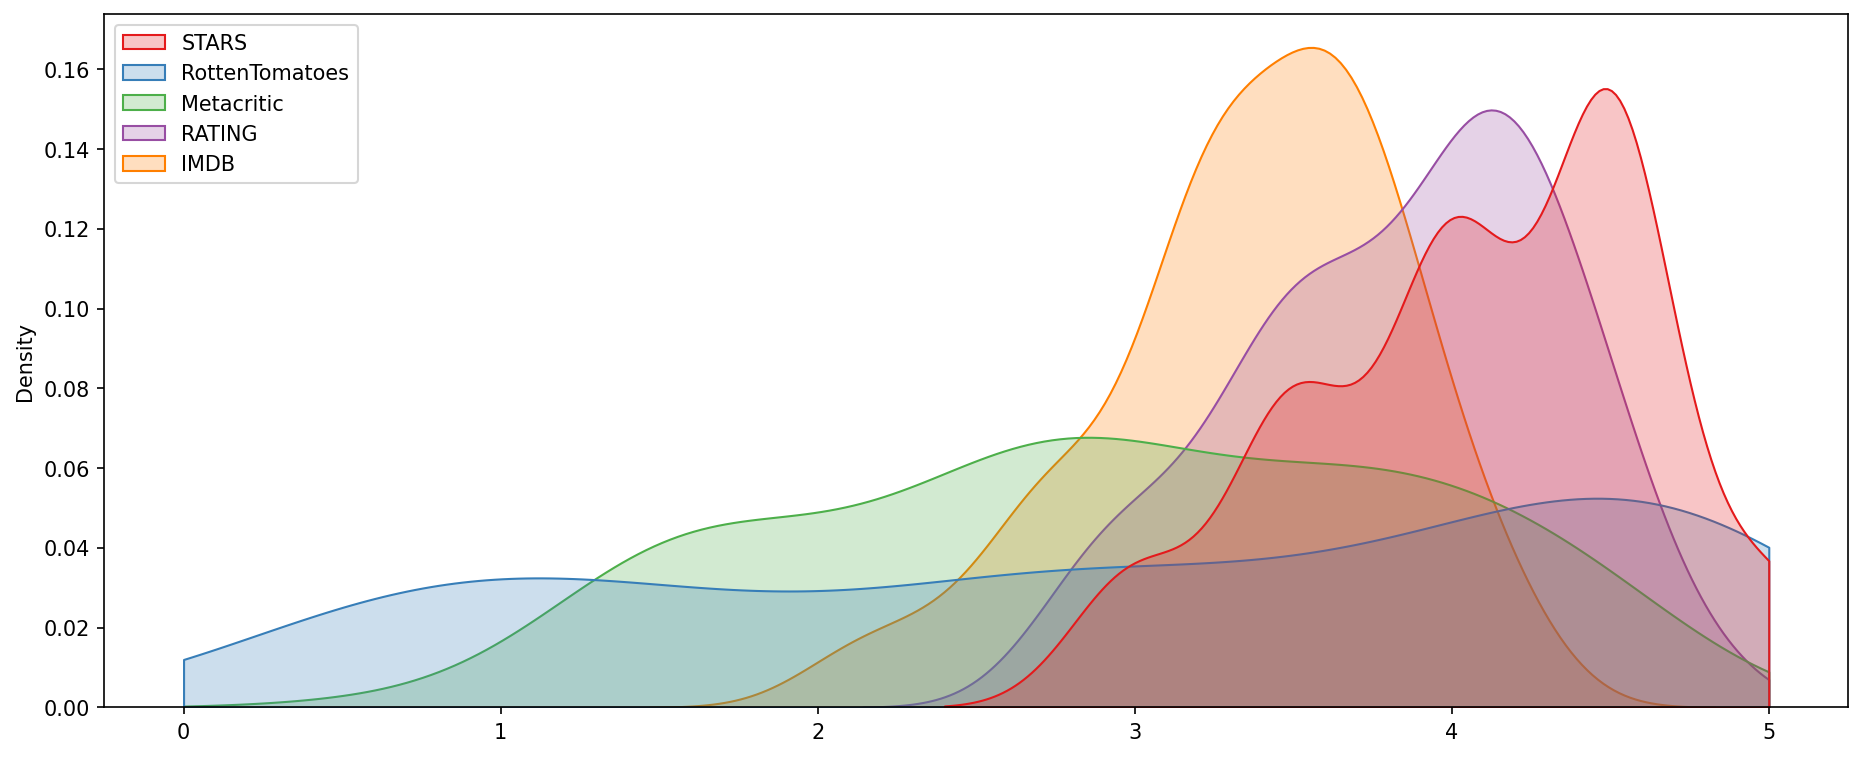

In [47]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_score,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. comparing  these two.** 

C:\Users\entro\AppData\Local\Temp\ipykernel_21040\4263327738.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_score[['RottenTomatoes','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)
C:\Users\entro\AppData\Local\Temp\ipykernel_21040\191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


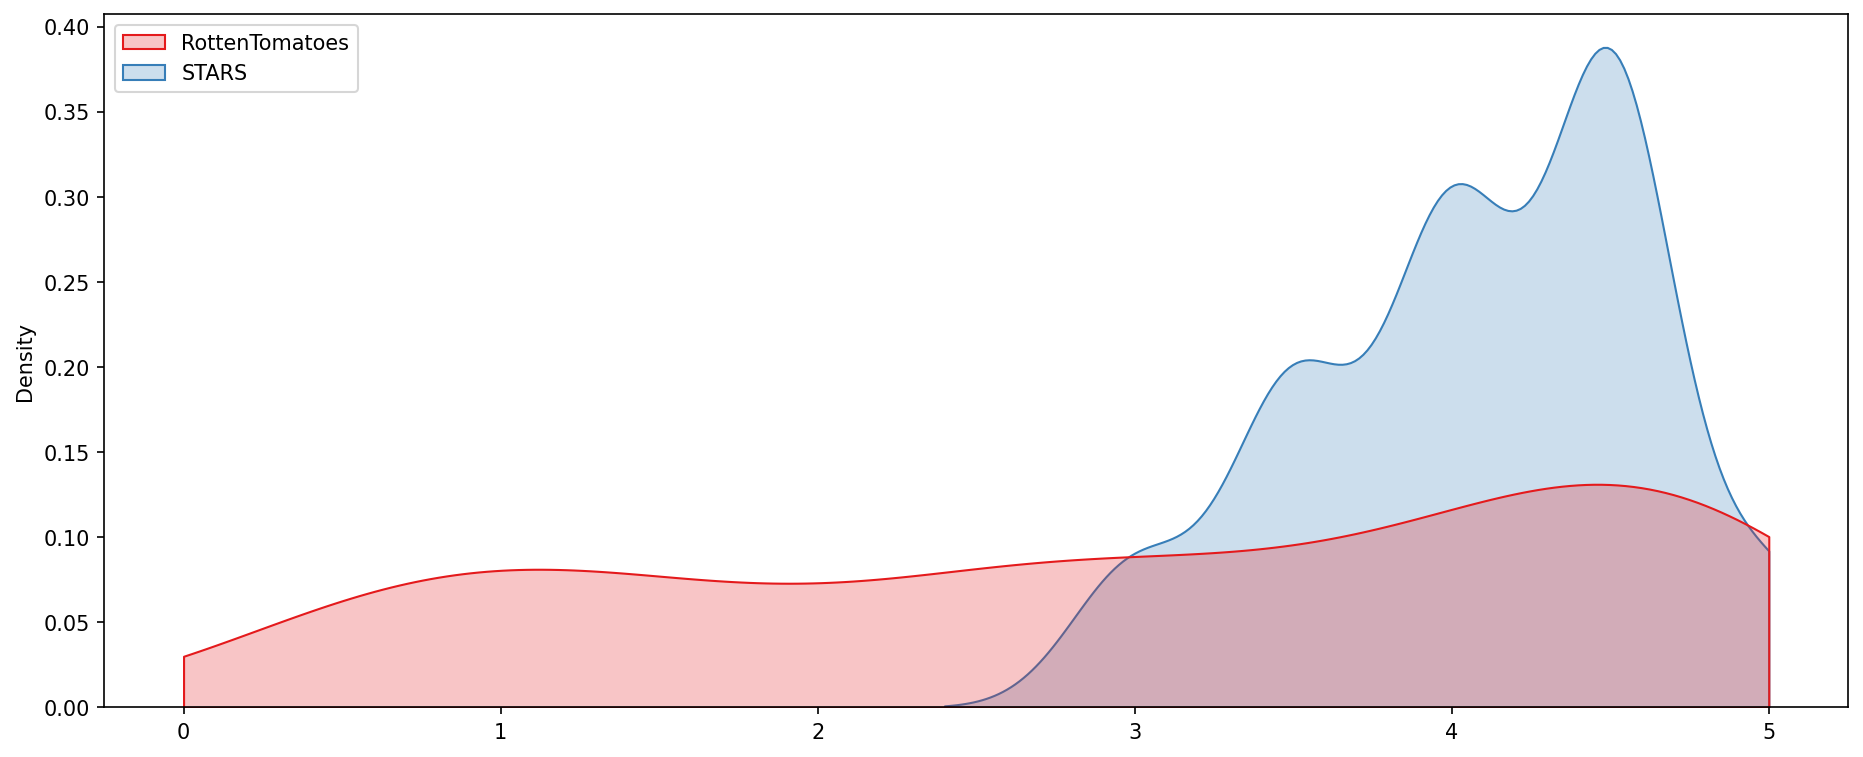

In [48]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_score[['RottenTomatoes','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

<Axes: ylabel='Count'>

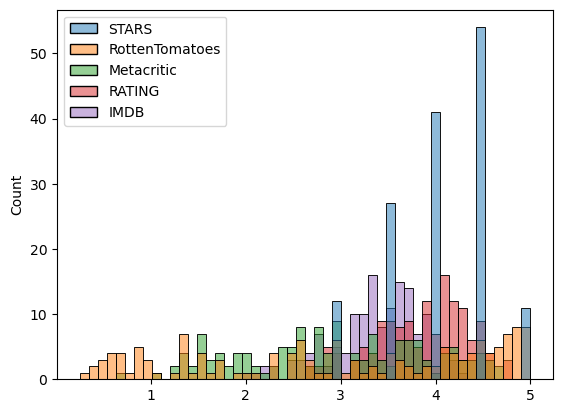

In [49]:
sns.histplot(norm_score,bins=50)


# Analysing How are the worst movies rated across all platforms?



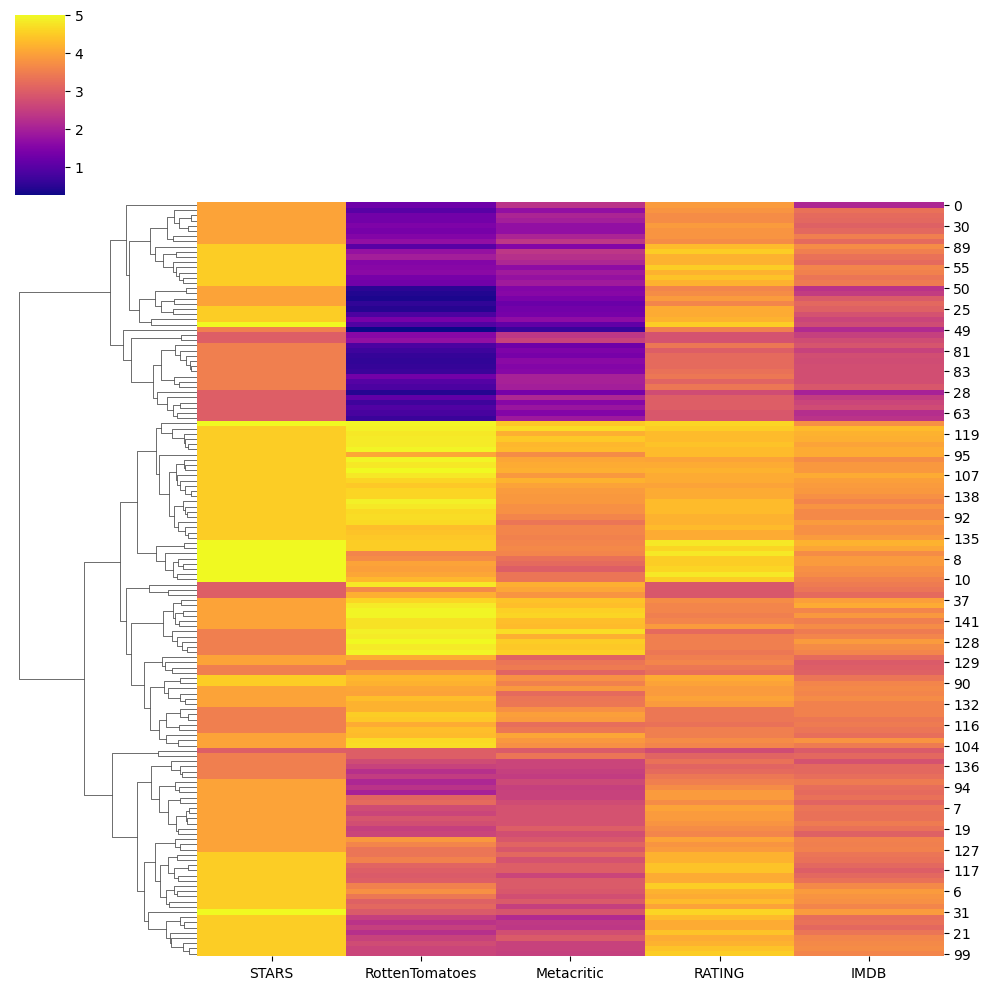

In [50]:
sns.clustermap(norm_score,col_cluster=False,cmap='plasma')

In [51]:
norm_score.nsmallest(10,"RottenTomatoes")

,STARS,RottenTomatoes,Metacritic,RATING,IMDB
49,3.5,0.25,0.65,3.5,2.15
84,4.0,0.35,1.40,3.9,2.95
54,4.0,0.40,1.55,3.7,2.45
25,4.5,0.45,1.30,4.1,3.05
28,3.0,0.45,1.35,2.7,2.00
50,4.0,0.50,1.50,3.6,2.30
87,3.5,0.55,1.60,3.2,2.70
88,4.0,0.55,1.20,3.6,3.15
77,3.5,0.60,1.50,3.2,2.75
78,3.5,0.60,1.35,3.2,2.75


**Visualizing the distribution of ratings across all sites for the top 10 worst movies.**

C:\Users\entro\AppData\Local\Temp\ipykernel_21040\1229135358.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')


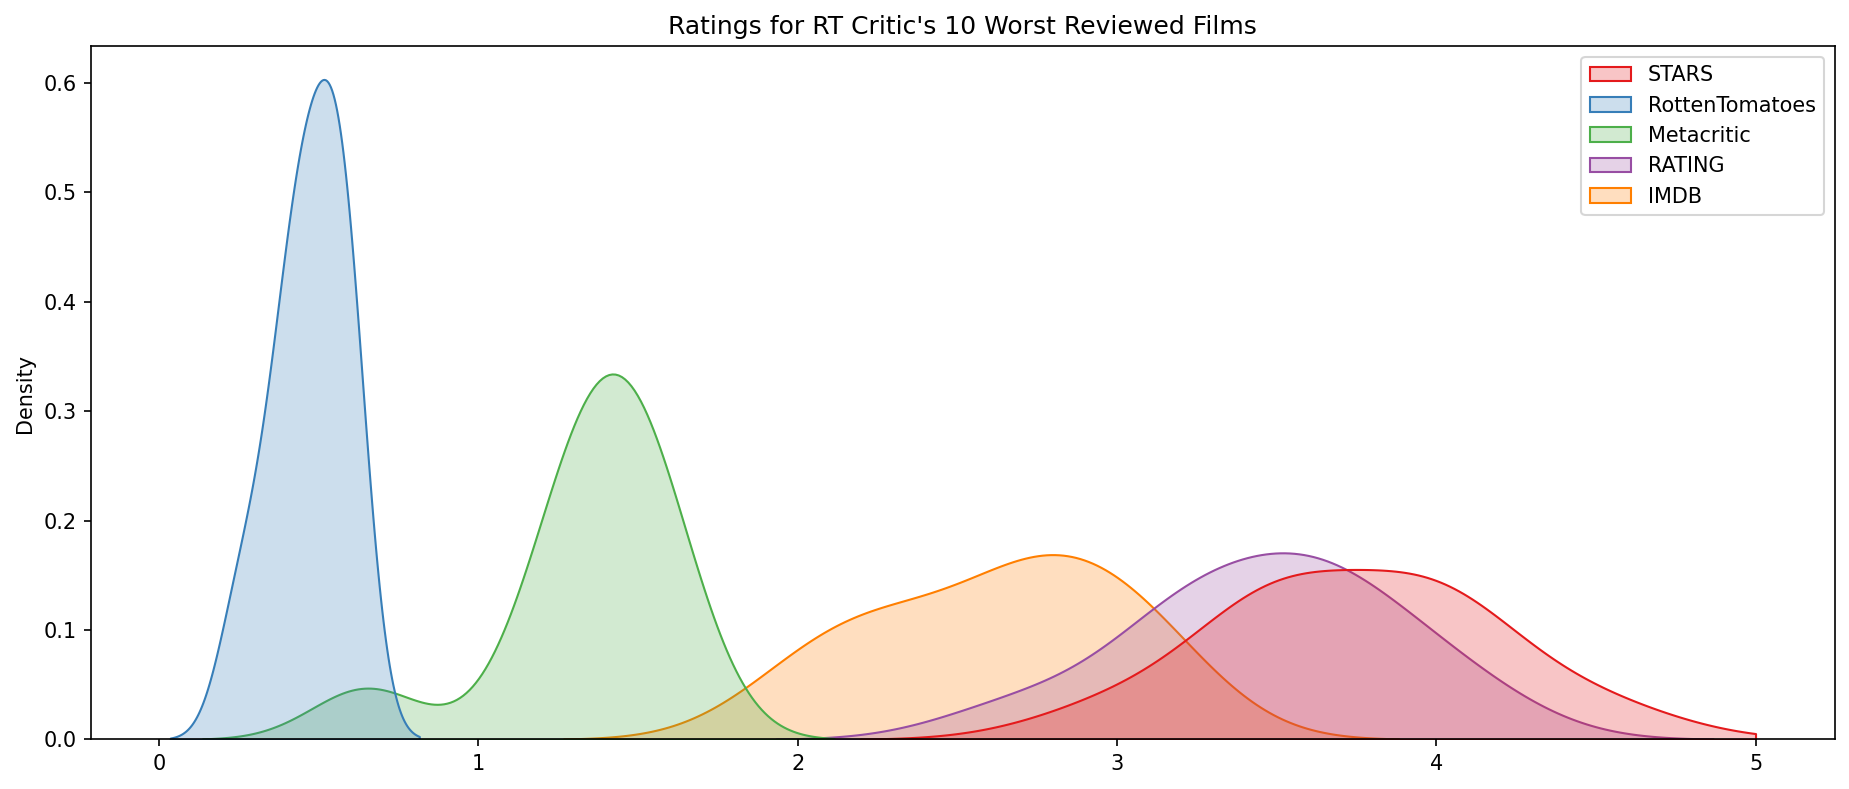

In [52]:
print('\n\n')
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_score.nsmallest(10,'RottenTomatoes')
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

In [53]:
##checking for tekken 3

In [54]:
norm_score.iloc[25]

STARS             4.50
RottenTomatoes    0.45
Metacritic        1.30
RATING            4.10
IMDB              3.05
Name: 25, dtype: float64

----